In [1]:
from os.path import join
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob
import os
from skimage.io import imread
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import ndimage
from skimage.morphology import square, dilation
%matplotlib inline

import utils
from utils import read_img_join_masks, add_contour, show_with_contour, iou_metric, show_img, diagnose_errors

img_id = '091944f1d2611c916b98c020bd066667e33f4639159b2a92407fe5a40788856d'
img, mask = read_img_join_masks(img_id)



In [2]:

mask2 = np.copy(mask)
#mask2 = scipy.ndimage.interpolation.shift(mask, 3)
#mask2 = dilation(mask2, square(3))
mask2 = ndimage.binary_dilation(mask2, structure=np.ones((10,10))).astype(mask2.dtype)
mask2, nf = scipy.ndimage.measurements.label(mask2)
print 'objects', nf, len(np.unique(mask))
#print 'iou', iou_metric(mask2, mask)
print 'diagnose'
diagnose_errors(mask2, mask,threshold=0.1)


objects 12 43
diagnose


NameError: global name 'ploc' is not defined

In [3]:
#show_with_contour(mask2,mask)

In [4]:
#a=np.array([[1,1,1,1],[1,1,1,0],[1,1,1,0],[1,1,1,0]])
#b=np.array([[1,0,2,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
#diagnose_errors(b, a)

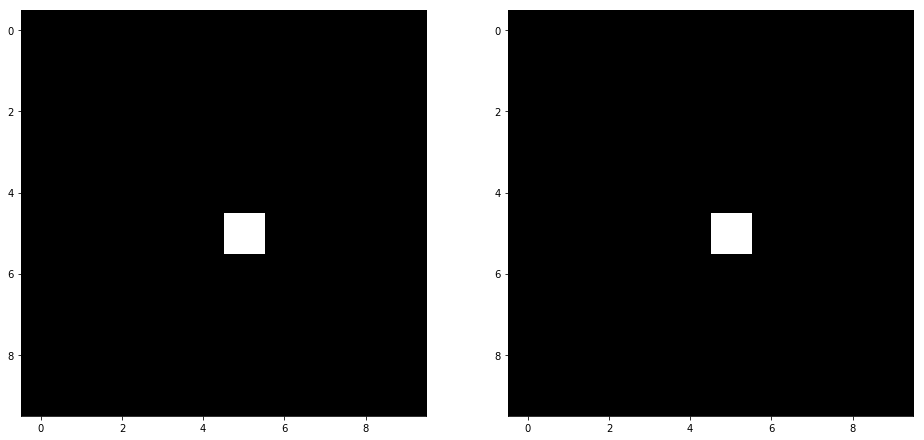

In [21]:
# Very strange, matplotlib seems to invert colors!!!
import matplotlib
import matplotlib.pyplot as plt
import skimage
from skimage.color import rgb2gray
from skimage import data
import numpy as np
#img = data.astronaut()
#img_gray = rgb2gray(img)
#fig, ax = plt.subplots(1,2, figsize=(16, 16))
#ax[0].imshow(img,cmap='gray')
#ax[1].imshow(img_gray,cmap='gray')
#plt.show()


img= np.zeros((10,10,3))
img[5,5,0]=1
img[5,5,1]=1
img[5,5,2]=1
img_gray = rgb2gray(img)
fig, ax = plt.subplots(1,2, figsize=(16, 16))
ax[0].imshow(img)
ax[1].imshow(img_gray,cmap='gray')
plt.show()
#show_images(ii)
#iii=np.repeat(np.expand_dims(rgb2grey(ii).astype(np.uint8),2),3,2)
#show_images([ii,rgb2grey(ii),iii])
#print iii



In [31]:
import torch
x = torch.Tensor([[1], [2], [3]])
x.unsqueeze(1)


(0 ,.,.) = 
  1

(1 ,.,.) = 
  2

(2 ,.,.) = 
  3
[torch.FloatTensor of size 3x1x1]

In [25]:
print x


 1
 2
 3
[torch.FloatTensor of size 3x1]

